In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
def add_to_class(Class):
    def wrapper(obj):
        setattr(Class, obj.__name__, obj)
    return wrapper

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
from torch import nn
from torch.nn import functional as F
import torchaudio
from torchaudio import datasets
import torchtext
from torchaudio.utils import download_asset

import os
import time
from tqdm import tqdm
import IPython.display as ipd

In [ ]:
!pip install lightning

In [5]:
import lightning as L

In [6]:
import sys
LIB_PATH = '/content/drive/MyDrive/GSC/GSC_helper'

sys.path.append(LIB_PATH)
from MDTC import MDTC
from GSC_zip import unzipzip, zipzip
from GSC import download_GSC

## Download Data

### None Augmentation MFCC
Using for none-aug experiment and online-aug experiment

In [7]:
ZIP_MAP = download_GSC('https://drive.google.com/file/d/1-ihU00J3iBw0bLe3rZtDH6ymacKVBIQK/view?usp=drive_link',
                       'https://drive.google.com/file/d/1-UwjYq7yF2BEqGkkX9Ck8JCCI7eFo14h/view?usp=drive_link',
                       'https://drive.google.com/file/d/1-YEZ0L2-f6JxRH0_ywI2TS3F24zb4VSb/view?usp=drive_link',
                       '/content/GSC_12_MFCC',
                       end = '.zip')
CSV_MAP = download_GSC('https://drive.google.com/file/d/1-I7D09WWsJAd0R8WAwHzRtS11Ft1ZlCQ/view?usp=drive_link',
                       'https://drive.google.com/file/d/1-GBnm-OIdJrzDKTfRGnKKtpWD_SEvrhz/view?usp=drive_link',
                       'https://drive.google.com/file/d/1-GmIoGi69V4LltEW6tUOVPlXYtanLgDL/view?usp=drive_link',
                       '/content/GSC_12_MFCC',
                       end = '.csv')

Downloading...
From (original): https://drive.google.com/uc?id=1-ihU00J3iBw0bLe3rZtDH6ymacKVBIQK
From (redirected): https://drive.google.com/uc?id=1-ihU00J3iBw0bLe3rZtDH6ymacKVBIQK&confirm=t&uuid=9e5550d8-2a14-49c5-9e2a-310efb40d555
To: /content/GSC_12_MFCC/train.zip
100%|██████████| 2.52G/2.52G [00:34<00:00, 73.3MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1-UwjYq7yF2BEqGkkX9Ck8JCCI7eFo14h
From (redirected): https://drive.google.com/uc?id=1-UwjYq7yF2BEqGkkX9Ck8JCCI7eFo14h&confirm=t&uuid=5d306052-b945-4a8f-b60f-cb2ea01fe5aa
To: /content/GSC_12_MFCC/val.zip
100%|██████████| 297M/297M [00:07<00:00, 41.8MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1-YEZ0L2-f6JxRH0_ywI2TS3F24zb4VSb
From (redirected): https://drive.google.com/uc?id=1-YEZ0L2-f6JxRH0_ywI2TS3F24zb4VSb&confirm=t&uuid=bd856598-d1a0-4583-b530-32d75d299d54
To: /content/GSC_12_MFCC/test.zip
100%|██████████| 146M/146M [00:03<00:00, 45.4MB/s]
Downloading...
From: https://drive.google.co

### Offline
One for all


In [8]:
ZIP_MAP = download_GSC('https://drive.google.com/file/d/1-9DXrkWnlSBBxRb3XYLBqhQYH37DdwV6/view?usp=drive_link',
                       'https://drive.google.com/file/d/1-UwjYq7yF2BEqGkkX9Ck8JCCI7eFo14h/view?usp=drive_link',
                       'https://drive.google.com/file/d/1-YEZ0L2-f6JxRH0_ywI2TS3F24zb4VSb/view?usp=drive_link',
                       '/content/GSC_12_MFCC',
                       end = '.zip')
CSV_MAP = download_GSC('https://drive.google.com/file/d/1JSrw7pJzkTdx4LCVV9IQlQfZqCXMLbCp/view?usp=drive_link',
                       'https://drive.google.com/file/d/1-GBnm-OIdJrzDKTfRGnKKtpWD_SEvrhz/view?usp=drive_link',
                       'https://drive.google.com/file/d/1-GmIoGi69V4LltEW6tUOVPlXYtanLgDL/view?usp=drive_link',
                       '/content/GSC_12_MFCC',
                       end = '.csv')

Downloading...
From (original): https://drive.google.com/uc?id=1-9DXrkWnlSBBxRb3XYLBqhQYH37DdwV6
From (redirected): https://drive.google.com/uc?id=1-9DXrkWnlSBBxRb3XYLBqhQYH37DdwV6&confirm=t&uuid=0106b889-2b77-4dda-bfcf-e0ea7fb1b7e2
To: /content/GSC_12_MFCC/train.zip
100%|██████████| 1.26G/1.26G [00:34<00:00, 36.1MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1-UwjYq7yF2BEqGkkX9Ck8JCCI7eFo14h
From (redirected): https://drive.google.com/uc?id=1-UwjYq7yF2BEqGkkX9Ck8JCCI7eFo14h&confirm=t&uuid=84740f4f-972a-4800-a7e3-b86bade5f3e5
To: /content/GSC_12_MFCC/val.zip
100%|██████████| 297M/297M [00:06<00:00, 48.6MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1-YEZ0L2-f6JxRH0_ywI2TS3F24zb4VSb
From (redirected): https://drive.google.com/uc?id=1-YEZ0L2-f6JxRH0_ywI2TS3F24zb4VSb&confirm=t&uuid=824a3785-b57a-49d3-b883-3ac8e2a64cd3
To: /content/GSC_12_MFCC/test.zip
100%|██████████| 146M/146M [00:03<00:00, 41.8MB/s]
Downloading...
From: https://drive.google.co

### Plus with other augmentations (no using mul-factor)

In [ ]:
ZIP_MAP = download_GSC('https://drive.google.com/file/d/1-0FwqLvAb69npc7DxSJVsxm6zaDmaTj_/view?usp=drive_link',
                       'https://drive.google.com/file/d/1-UwjYq7yF2BEqGkkX9Ck8JCCI7eFo14h/view?usp=drive_link',
                       'https://drive.google.com/file/d/1-YEZ0L2-f6JxRH0_ywI2TS3F24zb4VSb/view?usp=drive_link',
                       '/content/GSC_12_MFCC',
                       end = '.zip')
CSV_MAP = download_GSC('https://drive.google.com/file/d/18jFIhlDSAyDp5a0NgUIQvXy7TykCyLEG/view?usp=drive_link',
                       'https://drive.google.com/file/d/1-GBnm-OIdJrzDKTfRGnKKtpWD_SEvrhz/view?usp=drive_link',
                       'https://drive.google.com/file/d/1-GmIoGi69V4LltEW6tUOVPlXYtanLgDL/view?usp=drive_link',
                       '/content/GSC_12_MFCC',
                       end = '.csv')

### Plus with other augmentations (using mul-factor = 2)

In [ ]:
ZIP_MAP = download_GSC('https://drive.google.com/file/d/1-Q2jLkxkO-ZrsDWrtFovrBtIOxdfaga2/view?usp=drive_link',
                       'https://drive.google.com/file/d/1-UwjYq7yF2BEqGkkX9Ck8JCCI7eFo14h/view?usp=drive_link',
                       'https://drive.google.com/file/d/1-YEZ0L2-f6JxRH0_ywI2TS3F24zb4VSb/view?usp=drive_link',
                       '/content/GSC_12_MFCC',
                       end = '.zip')
CSV_MAP = download_GSC('https://drive.google.com/file/d/1-AUHnuVsFy93DrKsof_OagAdPa35GKun/view?usp=drive_link',
                       'https://drive.google.com/file/d/1-GBnm-OIdJrzDKTfRGnKKtpWD_SEvrhz/view?usp=drive_link',
                       'https://drive.google.com/file/d/1-GmIoGi69V4LltEW6tUOVPlXYtanLgDL/view?usp=drive_link',
                       '/content/GSC_12_MFCC',
                       end = '.csv')

## Dataset

In [9]:
TRAIN_TRANSFORM = torchaudio.transforms.SpecAugment(n_time_masks = 2,
                                      time_mask_param = 20,
                                      n_freq_masks = 2,
                                      freq_mask_param = 40)

In [10]:
class GSC(torch.utils.data.Dataset):
    def __init__(self, root, subset = 'train', zip_map = None, csv_map = None, unzip = True):
        super().__init__()
        local_path = os.path.join(root, subset)
        self.root = root
        if not os.path.exists(local_path):
            os.mkdir(local_path)
            unzipzip(zip_map[subset], local_path)
        if unzip:
            unzipzip(zip_map[subset], local_path)
        self.csv = pd.read_csv(csv_map[subset])
        self.subset = subset

    def __getitem__(self, idx):
        row = self.csv.iloc[idx]
        spec = np.load(os.path.join(self.root, row['link']))['arr_0']
        spec = torch.from_numpy(spec).unsqueeze(0)
        if self.subset == 'train':
            spec = TRAIN_TRANSFORM(spec)
        return spec, row['label']

    def __len__(self):
        return len(self.csv)

In [11]:
class SC_12(L.LightningDataModule):
    def __init__(self, root, batch_size, zip_map, csv_map):
        super().__init__()
        self.root = root
        self.batch_size = batch_size
        self.train_dataset = GSC(root,
                                 subset = 'train',
                                 zip_map = zip_map,
                                 csv_map = csv_map,
                                 unzip = False)
        self.val_dataset = GSC(root,
                               subset = 'val',
                               zip_map = zip_map,
                               csv_map = csv_map,
                               unzip = False)
        self.test_dataset = GSC(root,
                                subset = 'test',
                                zip_map = zip_map,
                                csv_map = csv_map,
                                unzip = False)

    def train_dataloader(self):
        return torch.utils.data.DataLoader(self.train_dataset,
                                           batch_size = self.batch_size,
                                           shuffle = True,
    #                                       collate_fn = self.collate_fn,
    #                                       num_workers = 1,
    #                                       prefetch_factor = 1,
                                           pin_memory = True)

    def val_dataloader(self):
        return torch.utils.data.DataLoader(self.val_dataset,
                                           batch_size = self.batch_size,
                                           shuffle = False,
     #                                      collate_fn = self.collate_fn,
     #                                      num_workers = 1,
     #                                      prefetch_factor = 1,
                                           pin_memory = True)

    def test_dataloader(self):
        return torch.utils.data.DataLoader(self.test_dataset,
                                           batch_size = self.batch_size,
                                           shuffle = False,
      #                                     collate_fn = self.collate_fn,
      #                                     num_workers = 1,
      #                                     prefetch_factor = 1
                                           pin_memory = True)

## Model

In [12]:
class MDTC_training(L.LightningModule):
    def __init__(self, lr, in_channels, num_classes, *args, **kwargs):
        super().__init__(*args, **kwargs)
        #self.automatic_optimization = False
        self.lr = lr
        self.linear = nn.Linear(in_channels, 64)
        self.net = MDTC(in_channels = 64,
             out_channels = 64,
             kernel_size = 5,
             stack_num = 4,
             stack_size = 4,
             classification = True,
             hidden_size = 64,
             num_classes = num_classes,
             dropout = 0.5)

    def forward(self, input):
        input = self.linear(input.squeeze(1).transpose(1, 2))
        return self.net(input.transpose(1, 2))

In [ ]:
!pip install torchinfo

In [ ]:
from torchinfo import summary

net = MDTC_training(lr = 0.001, in_channels = 80, num_classes = 12)
summary(net, input_size = (128, 1, 80, 101))

In [13]:
@add_to_class(MDTC_training)
def accuracy(self, Y_hat, Y, averaged = True):
    """
    Compute the number of correct predictions
    """
    Y_hat = Y_hat.reshape((-1, Y_hat.shape[-1]))
    preds = Y_hat.argmax(dim = 1).type(Y.dtype)
    compare = (preds == Y.reshape(-1)).type(torch.float32)
    return compare.mean() if averaged else compare

@add_to_class(MDTC_training)
def training_step(self, batch, batch_idx):
    x, y = batch
    y_hat = self.forward(x)
    loss = self.loss(y_hat, y)
    acc = self.accuracy(y_hat, y)

    # single scheduler
    # sch = self.lr_schedulers()
    #sch.step()
    torch.nn.utils.clip_grad_norm(self.parameters(), 5)

    values = {"train_loss": loss, "train_acc": acc}
    self.log_dict(values, prog_bar = True)
    return loss

@add_to_class(MDTC_training)
def validation_step(self, batch, batch_idx):
    x, y = batch
    y_hat = self.forward(x)
    loss = self.loss(y_hat, y)
    acc = self.accuracy(y_hat, y)
    values = {"val_loss": loss, "val_acc": acc}
    self.log_dict(values, prog_bar = True)
    return values

@add_to_class(MDTC_training)
def configure_optimizers(self):
    optimizer = torch.optim.Adam(self.parameters(), self.lr, weight_decay = 0.00005)
    #lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size = 3, gamma = 0.8)
    #return [optimizer], [lr_scheduler]
    return optimizer

#@add_to_class(MDTC_training)
#def lr_schedulers(self):
#    lr_scheduler = torch.optim.lr_scheduler.StepLR(self.configure_optimizers(), step_size = 3, gamma = 0.8)
#    return lr_scheduler

#@add_to_class(MDTC_training)
#def optimizer_step(self, epoch, batch_idx, optimizer, optimizer_closure):
    # update params
#    optimizer.step(closure = optimizer_closure)

    # manually warm up lr withou a scheduler
#    if self.trainer.global_step < 2000:
#        lr_scale = self.trainer.global_step/2000
#    else:
#        lr_scale = (2000/self.trainer.global_step)**0.5

#    for pg in optimizer.param_groups:
#        pg['lr'] = lr_scale*self.lr

In [14]:
@add_to_class(MDTC_training)
def test_step(self, batch, batch_idx):
    x, y = batch
    y_hat = self.forward(x)
    loss = self.loss(y_hat, y)
    acc = self.accuracy(y_hat, y)
    values = {"test_loss": loss, "test_acc": acc}
    self.log_dict(values, prog_bar = True)

In [15]:
@add_to_class(MDTC_training)
def loss(self, y_hat, y):
    return F.cross_entropy(y_hat, y, reduction = 'mean')

In [16]:
data_12 = SC_12('/content/GSC_12_MFCC', 100, ZIP_MAP, CSV_MAP)

Extracted /content/GSC_12_MFCC/train.zip
Extracted /content/GSC_12_MFCC/val.zip
Extracted /content/GSC_12_MFCC/test.zip


In [ ]:
data_12 = SC_12('/content/GSC_12_MFCC', 128, ZIP_MAP, CSV_MAP)

In [ ]:
data_12 = SC_12('/content/GSC_12_MFCC', 512, ZIP_MAP, CSV_MAP)

In [17]:
from lightning.pytorch.callbacks.early_stopping import EarlyStopping
from lightning.pytorch.callbacks import ModelCheckpoint, LearningRateMonitor
early_stopping_callback = EarlyStopping(monitor = "val_acc", min_delta = 0.0001, patience = 5, mode = "max")
checkpoint_callback = ModelCheckpoint(dirpath = '/content/drive/MyDrive/GSC_ckpt/MFCC/best_model_noise2',
                                      save_top_k = 5, monitor = 'val_acc',
                                      mode = 'max',
                                      filename = 'mdtc-gsc-12-{epoch:02d}-{val_loss:.2f}-{val_acc:.4f}')
lr_monitor = LearningRateMonitor(logging_interval='step')

## Noise, but extra data (using mul-factor)

In [ ]:
from lightning.pytorch import seed_everything

seed_everything(42)

net = MDTC_training(0.001, in_channels = 80, num_classes = 12)

trainer = L.Trainer(accelerator="gpu",
                    callbacks = [early_stopping_callback, checkpoint_callback,
                                 lr_monitor],
                    enable_checkpointing=True,
                    default_root_dir = "/content/drive/MyDrive/GSC_ckpt/MFCC/logging_noise2",
                    max_epochs=100)
trainer.fit(net, data_12)

### Noise, but no extra data (no using mul-factor)

In [ ]:
from lightning.pytorch import seed_everything

seed_everything(42)

net = MDTC_training(0.001, in_channels = 80, num_classes = 12)

trainer = L.Trainer(accelerator="gpu",
                    callbacks = [early_stopping_callback, checkpoint_callback,
                                 lr_monitor],
                    enable_checkpointing=True,
                    default_root_dir = "/content/drive/MyDrive/GSC_ckpt/MFCC/logging",
                    max_epochs=100)
trainer.fit(net, data_12, ckpt_path = '/content/drive/MyDrive/GSC_ckpt/MFCC/best_model/mdtc-gsc-12-epoch=34-val_loss=0.14-val_acc=0.9595.ckpt')

### Online

In [ ]:
from lightning.pytorch import seed_everything

seed_everything(42)

net = MDTC_training(0.001, in_channels = 80, num_classes = 12)

trainer = L.Trainer(accelerator="gpu",
                    callbacks = [early_stopping_callback, checkpoint_callback,
                                 lr_monitor],
                    enable_checkpointing=True,
                    default_root_dir = "/content/mdtc1",
                    max_epochs=100)
trainer.fit(net, data_12)

### Offline

In [ ]:
from lightning.pytorch import seed_everything

seed_everything(42)

net = MDTC_training(0.001, in_channels = 80, num_classes = 12)

trainer = L.Trainer(accelerator="gpu",
                    callbacks = [early_stopping_callback, checkpoint_callback,
                                 lr_monitor],
                    enable_checkpointing=True,
                    default_root_dir = "/content/mdtc1",
                    max_epochs=100)
trainer.fit(net, data_12)

In [ ]:
zipzip('/content/best_model', '/content/drive/MyDrive/KWS/Process/MDTC/best_model_onfly.zip')

In [ ]:
import tensorflow as tf
from tensorflow.python.summary.summary_iterator import summary_iterator

In [ ]:
losses = []
accs = []
epochs = []
for summary in summary_iterator("/content/mdtc1/lightning_logs/version_0/events.out.tfevents.1710942302.83bc5cce5f93.436.0"):
    ss = summary.summary.value
    for s in ss:
      if s.tag == 'train_loss':
          losses.append(s.simple_value)
      if s.tag == 'epochs':
          epochs.append(s.simple_value)
      if s.tag == 'val_acc':
          accs.append(s.simple_value)

In [ ]:
epochs

In [ ]:
max(accs)

# Testing

In [18]:
from torchmetrics.classification import MulticlassConfusionMatrix

In [19]:
def test(trainer, model, dataloaders, ckpt_directory):
    ckpt_paths = os.listdir(ckpt_directory)
    loss = []
    acc = []
    for ckpt_path in ckpt_paths:
        logger = trainer.test(model = model,
                              dataloaders = dataloaders,
                              ckpt_path = os.path.join(ckpt_directory, ckpt_path),
                              verbose = False)
        loss.append(logger[0]['test_loss'])
        acc.append(logger[0]['test_acc'])
    return loss, acc, sum(loss)/len(loss), sum(acc)/len(acc)

In [20]:
def predict(model, dataloader, num_classes, ckpt_directory):
    ckpt_paths = os.listdir(ckpt_directory)
    metrics = []
    for ckpt_path in ckpt_paths:
        ckpt = torch.load(os.path.join(ckpt_directory, ckpt_path))
        model.load_state_dict(ckpt['state_dict'])
        test_model = model.eval()
        metric = 0
        for idx, (x, y) in tqdm(enumerate(dataloader)):
            confmat = MulticlassConfusionMatrix(num_classes = num_classes)
            #if idx%10 == 0:
            #    print(f'{idx}/{len(dataloader)}')
            pred = test_model(x)
            metric += confmat(pred, y)
        metrics.append(metric)
    return metrics

In [21]:
def plot_confmat(mat, num_classes, confmat_name, default_dir, save = True):
    fig, ax = plt.subplots(figsize = (5, 5))
    im = ax.matshow(mat)
    for i in range(num_classes):
        for j in range(num_classes):
            ax.text(j, i, mat[i][j].item(),
                  ha="center", va="center", color="w", fontsize = 10)
    ax.figure.colorbar(im, ax = ax)
    ax.set_xticks(np.arange(num_classes))
    ax.set_yticks(np.arange(num_classes))
    fig.savefig(os.path.join(default_dir, confmat_name + '.png'), dpi = 1000)
    return fig, ax

In [22]:
from lightning.pytorch import seed_everything

seed_everything(42)

net = MDTC_training(0.001, in_channels = 80, num_classes = 12)

trainer = L.Trainer(accelerator="gpu",
                    callbacks = [early_stopping_callback, checkpoint_callback,
                                 lr_monitor],
                    enable_checkpointing=True,
                    default_root_dir = "/content/drive/MyDrive/GSC_ckpt/MFCC/logging_noise2",
                    max_epochs=100)
# trainer.fit(net, data_12)

INFO: Seed set to 42
INFO:lightning.fabric.utilities.seed:Seed set to 42
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


## Noise 1

In [ ]:
loss1, acc1, mloss1, macc1 = test(trainer, net, data_12, '/content/drive/MyDrive/GSC_ckpt/MFCC/best_model')

In [ ]:
print('Max acc on Noise 1 set:',max(acc1))
print('Mean acc on Noise 1 ckpt set:', macc1)

Max acc on Noise 1 set: 0.9163599610328674
Mean acc on Noise 1 ckpt set: 0.9040899991989135


In [ ]:
acc1.index(max(acc1))

2

In [24]:
metrics1 = predict(net, data_12.test_dataloader(), 12, '/content/drive/MyDrive/GSC_ckpt/MFCC/best_model')

49it [00:20,  2.40it/s]
49it [00:19,  2.50it/s]
49it [00:22,  2.19it/s]
49it [00:22,  2.14it/s]
49it [00:26,  1.83it/s]


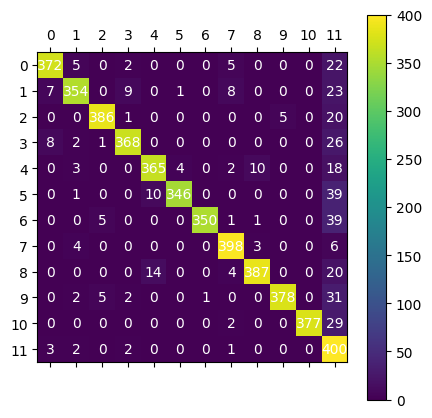

In [25]:
fig, ax = plot_confmat(metrics1[2], 12, 'noise1_confmat', '/content/drive/MyDrive/GSC_ckpt/MFCC/visualize')

## Noise 2

In [ ]:
loss2, acc2, mloss2, macc2 = test(trainer, net, data_12, '/content/drive/MyDrive/GSC_ckpt/MFCC/best_model_noise2')

In [27]:
print('Max acc on Noise 2 set:',max(acc2))
print('Mean acc on Noise 2 ckpt set:', macc2)

Max acc on Noise 2 set: 0.9202454090118408
Mean acc on Noise 2 ckpt set: 0.9065030813217163


In [28]:
acc2.index(max(acc2))

2

In [29]:
metrics2 = predict(net, data_12.test_dataloader(), 12, '/content/drive/MyDrive/GSC_ckpt/MFCC/best_model_noise2')

49it [00:17,  2.75it/s]
49it [00:19,  2.58it/s]
49it [00:18,  2.64it/s]
49it [00:19,  2.52it/s]
49it [00:18,  2.62it/s]


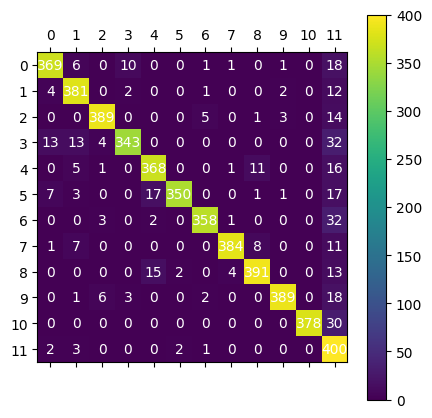

In [30]:
fig, ax = plot_confmat(metrics2[2], 12, 'noise2_confmat', '/content/drive/MyDrive/GSC_ckpt/MFCC/visualize')

## Non-Augment

In [31]:
unzipzip('/content/drive/MyDrive/GSC_ckpt/MFCC/best_model.zip', '/content/non_augmentation_ckpt')

Extracted /content/drive/MyDrive/GSC_ckpt/MFCC/best_model.zip


In [ ]:
loss3, acc3, mloss3, macc3 = test(trainer, net, data_12, '/content/non_augmentation_ckpt')

In [33]:
print('Max acc on non-augment set:',max(acc3))
print('Mean acc on non-augment ckpt set:', macc3)

Max acc on non-augment set: 0.9173824191093445
Mean acc on non-augment ckpt set: 0.9127607464790344


In [34]:
acc3.index(max(acc3))

2

In [35]:
metrics3 = predict(net, data_12.test_dataloader(), 12, '/content/non_augmentation_ckpt')

49it [00:36,  1.35it/s]
49it [00:52,  1.07s/it]
49it [00:58,  1.20s/it]
49it [00:21,  2.27it/s]
49it [00:43,  1.12it/s]


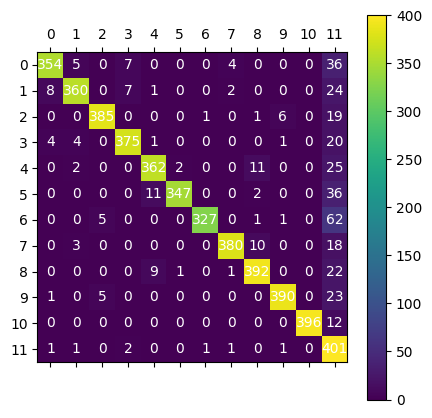

In [36]:
fig, ax = plot_confmat(metrics3[3], 12, 'non_aug_confmat', '/content/drive/MyDrive/GSC_ckpt/MFCC/visualize')

## Augment on the fly

In [37]:
unzipzip('/content/drive/MyDrive/GSC_ckpt/MFCC/best_model_onfly.zip', '/content/aug_onfly_ckpt')

Extracted /content/drive/MyDrive/GSC_ckpt/MFCC/best_model_onfly.zip


In [ ]:
loss4, acc4, mloss4, macc4 = test(trainer, net, data_12, '/content/aug_onfly_ckpt')

In [39]:
print('Max acc on onfly-aug set:',max(acc4))
print('Mean acc on onfly-aug ckpt set:', macc4)

Max acc on onfly-aug set: 0.9212679266929626
Mean acc on onfly-aug ckpt set: 0.9127198696136475


In [40]:
acc4.index(max(acc4))

2

In [42]:
metrics4 = predict(net, data_12.test_dataloader(), 12, '/content/aug_onfly_ckpt')

49it [00:55,  1.14s/it]
49it [00:56,  1.16s/it]
49it [00:54,  1.12s/it]
49it [00:54,  1.11s/it]
49it [00:49,  1.02s/it]


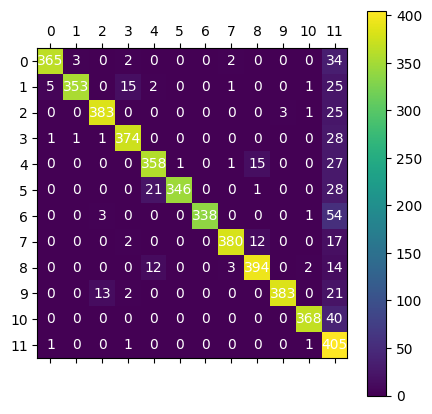

In [43]:
fig, ax = plot_confmat(metrics4[3], 12, 'aug_onfly_confmat', '/content/drive/MyDrive/GSC_ckpt/MFCC/visualize')